In [106]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.ensemble import RandomForestClassifier

In [7]:
def show_correlation_graph(data, title=None, cmap=None, linewidths=0, figsize=(9, 6), annot=True):
    """Utility to plot the correlation graph for the passed in data."""
    if cmap is None:
        cmap = sns.diverging_palette(10, 120, as_cmap=True)
    data = data.dropna()    
    corr = data.corr()
    for column_name in corr.columns:
        corr[column_name] = corr[column_name].abs()
    _, ax = plt.subplots(figsize=figsize)
    if title:
        ax.set_title(title)

    sns.heatmap(corr, annot=annot, fmt="2.2f", linewidths=linewidths, ax=ax, cmap=cmap)    

In [92]:
# Download data from:
# https://www.kaggle.com/datasets/seshadrikolluri/ansur-ii?select=ANSUR+II+MALE+Public.csv

filename = "ANSUR-II-male.csv"
df = pd.read_csv(f"./data/{filename}", encoding="latin-1")
df = df.sample(frac=1)
df = df.drop(["Gender", "Date", "subjectid"], axis=1)
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
2095,245,1357,330,224,1259,247,182,412,340,286,...,Combat Arms,13B,Texas,3,Mexican,3,22,65,163,Right hand
73,232,1379,311,213,1284,242,184,421,328,280,...,Combat Service Support,91B,Oklahoma,1,NaN,1,22,69,165,Left hand
2443,209,1506,333,222,1385,257,207,422,347,253,...,Combat Arms,11B,Illinois,1,NaN,1,26,73,175,Right hand
3603,255,1378,320,215,1270,242,204,395,364,262,...,Combat Arms,12B,New York,31,Puerto Rican,3,26,67,170,Right hand
2595,211,1388,319,226,1270,254,192,425,360,275,...,Combat Arms,11B,Vietnam,4,Cambodian Vietnamese,4,24,67,177,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,223,1375,333,219,1271,247,204,425,327,245,...,Combat Support,68W,Pennsylvania,2,NaN,2,26,67,158,Right hand
1893,246,1523,352,238,1387,255,204,394,344,291,...,Combat Service Support,46Z,Wisconsin,1,NaN,1,40,72,190,Left hand
1746,256,1458,343,234,1330,258,200,395,373,286,...,Combat Service Support,91B,Arkansas,1,NaN,1,30,70,200,Right hand
1681,316,1397,320,235,1276,259,193,417,363,294,...,Combat Arms,11B,Arizona,1,NaN,1,40,67,185,Right hand


,chestbreadth,chestcircumference,chestdepth,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion
2095,289,1051,239,1201,336,302,570,457,1179,366,158,466,334,957,234,384,997
73,284,983,236,1253,326,287,542,442,1156,344,157,458,324,922,226,424,1006
2443,293,1050,235,1358,344,306,594,472,1160,362,153,474,296,830,191,370,1137
3603,286,1038,249,1253,331,320,639,449,1178,345,140,467,311,948,256,359,1042
2595,305,1053,247,1235,330,305,591,459,1198,350,148,471,293,835,211,379,990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,268,968,226,1249,361,305,493,497,1162,359,161,467,279,815,216,398,1013
1893,311,1072,238,1309,355,299,649,486,1147,372,140,485,350,958,227,370,1110
1746,277,1029,265,1291,357,302,567,482,1154,374,146,476,352,994,237,388,1078
1681,301,1123,268,1236,326,311,590,449,1221,350,142,511,358,1081,293,431,956


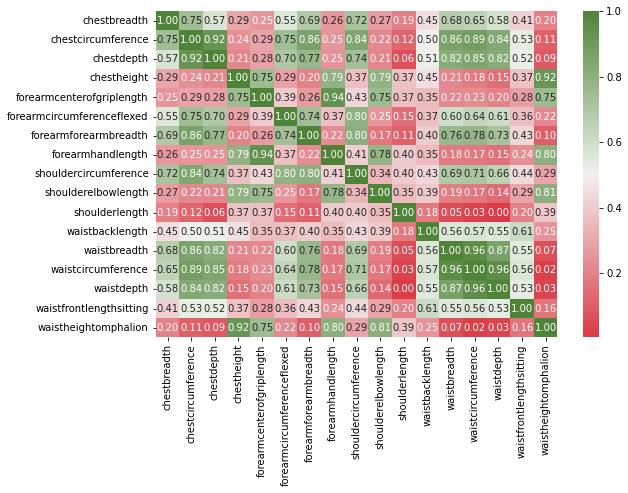

In [93]:
keywords = ["arm", "chest", "waist", "shoulder"]
columns_to_use = []
for c in df.columns: 
    for k in keywords:
        if k.upper() in c.upper():
            columns_to_use.append(c)
            break
features = df[columns_to_use].copy()
display(features)
show_correlation_graph(features)


/tmp/ipykernel_190196/4244721909.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,chestbreadth,chestcircumference,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistfrontlengthsitting
2095,289,1051,1201,336,302,1179,366,158,466,384
73,284,983,1253,326,287,1156,344,157,458,424
2443,293,1050,1358,344,306,1160,362,153,474,370
3603,286,1038,1253,331,320,1178,345,140,467,359
2595,305,1053,1235,330,305,1198,350,148,471,379
...,...,...,...,...,...,...,...,...,...,...
620,268,968,1249,361,305,1162,359,161,467,398
1893,311,1072,1309,355,299,1147,372,140,485,370
1746,277,1029,1291,357,302,1154,374,146,476,388
1681,301,1123,1236,326,311,1221,350,142,511,431


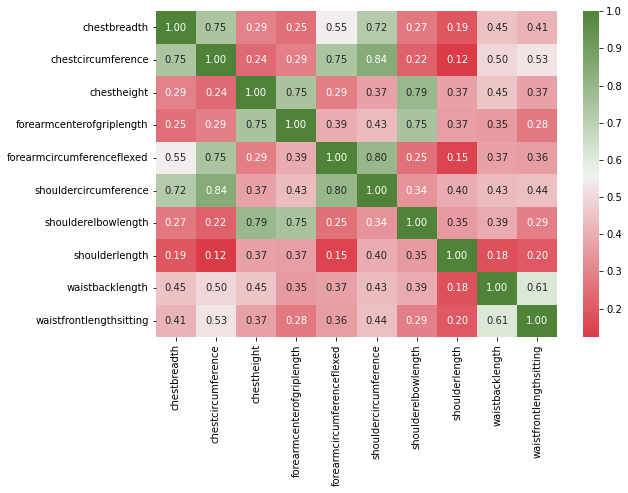

In [94]:
corr_matrix = features.corr().abs()
corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
uncorrelated = features.drop(to_drop, axis=1)
display(uncorrelated)
show_correlation_graph(uncorrelated)

In [95]:
uncorrelated

,chestbreadth,chestcircumference,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistfrontlengthsitting
2095,289,1051,1201,336,302,1179,366,158,466,384
73,284,983,1253,326,287,1156,344,157,458,424
2443,293,1050,1358,344,306,1160,362,153,474,370
3603,286,1038,1253,331,320,1178,345,140,467,359
2595,305,1053,1235,330,305,1198,350,148,471,379
...,...,...,...,...,...,...,...,...,...,...
620,268,968,1249,361,305,1162,359,161,467,398
1893,311,1072,1309,355,299,1147,372,140,485,370
1746,277,1029,1291,357,302,1154,374,146,476,388
1681,301,1123,1236,326,311,1221,350,142,511,431


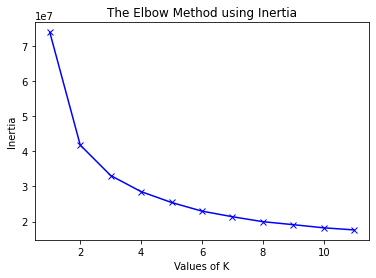

In [96]:
trials = []
models = {}
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(uncorrelated)
    models[n_clusters] = kmeans
    trials.append([n_clusters, kmeans.inertia_])

inertias = pd.DataFrame(trials, columns=["K", "V"])
inertias

plt.plot(inertias.K, inertias.V, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [97]:
NUM_CLUSTERS = 6
model = models[NUM_CLUSTERS]

In [98]:
y = model.labels_
y

array([0, 0, 1, ..., 0, 4, 0], dtype=int32)

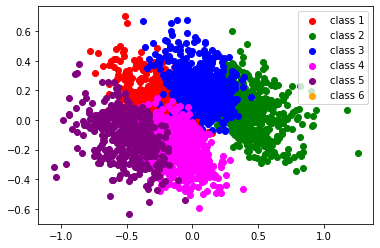

In [99]:
X = uncorrelated
X_norm = (X - X.min())/(X.max() - X.min())

pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

colors = ["red", "green", "blue", "fuchsia", "purple", "orange"]

for cluster_id in range(1, NUM_CLUSTERS+1):
    label = f"class {cluster_id}"
    color = colors[cluster_id-1]
    plt.scatter(transformed[y==cluster_id][0], transformed[y==cluster_id][1], label=label, c=color)
    

plt.legend()
plt.show()


In [103]:
X_norm

,chestbreadth,chestcircumference,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistfrontlengthsitting
2095,0.439394,0.398561,0.270335,0.365079,0.408284,0.520492,0.544,0.625000,0.386047,0.452736
73,0.401515,0.300719,0.394737,0.285714,0.319527,0.473361,0.368,0.611111,0.348837,0.651741
2443,0.469697,0.397122,0.645933,0.428571,0.431953,0.481557,0.512,0.555556,0.423256,0.383085
3603,0.416667,0.379856,0.394737,0.325397,0.514793,0.518443,0.376,0.375000,0.390698,0.328358
2595,0.560606,0.401439,0.351675,0.317460,0.426036,0.559426,0.416,0.486111,0.409302,0.427861
...,...,...,...,...,...,...,...,...,...,...
620,0.280303,0.279137,0.385167,0.563492,0.426036,0.485656,0.488,0.666667,0.390698,0.522388
1893,0.606061,0.428777,0.528708,0.515873,0.390533,0.454918,0.592,0.375000,0.474419,0.383085
1746,0.348485,0.366906,0.485646,0.531746,0.408284,0.469262,0.608,0.458333,0.432558,0.472637
1681,0.530303,0.502158,0.354067,0.285714,0.461538,0.606557,0.416,0.402778,0.595349,0.686567


In [100]:
columns = [
    "chestbreadth",
    "chestcircumference",
    "chestheight",
    "forearmcenterofgriplength",
    "forearmcircumferenceflexed",
    "shouldercircumference",
    "shoulderelbowlength",
    "shoulderlength",
    "waistbacklength",
    "waistfrontlengthsitting"
]


centroids = pd.DataFrame(model.cluster_centers_, columns=columns)
#_ = plt.scatter(centroids["chestbreadth"],centroids["chestcircumference"],color='red', marker="o", s=213)

In [81]:
centroids

,chestbreadth,chestcircumference,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistfrontlengthsitting
0,287.138203,1049.286278,1251.985192,339.114511,306.839092,1163.076012,353.749260,146.321816,468.591313,380.750247
1,278.279944,980.267409,1322.554318,355.064067,296.362117,1137.616992,371.302228,151.594708,473.034819,376.883008
2,302.041791,1141.779104,1270.861194,346.594030,323.549254,1225.744776,359.380597,149.417910,486.205970,399.288060
3,314.121294,1212.256065,1344.458221,365.463612,342.808625,1290.970350,377.347709,156.123989,506.630728,416.603774
4,267.962366,942.037634,1234.311828,332.129032,284.507168,1091.611111,347.507168,144.578853,451.247312,362.100358
5,295.736702,1083.086436,1347.704787,363.122340,318.255319,1205.679521,379.030585,153.736702,491.726064,401.490691


 Since the measurements are in millimeters (expect from mass wihci is hectograms but we do not have them here) let's convert all the data to centimeters:

In [105]:
centroids_adj  = centroids / 25.4
centroids_adj

,chestbreadth,chestcircumference,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistfrontlengthsitting
0,11.297371,41.272774,49.313863,13.357777,12.076791,45.779190,13.932902,5.761078,18.444690,14.985764
1,11.638674,42.614036,53.065574,14.297054,12.528628,47.450258,14.925387,6.053785,19.367486,15.805393
2,10.550969,37.092137,48.584306,13.074902,11.201071,42.975273,13.679332,5.693013,17.765040,14.254659
3,10.949044,38.551744,52.106974,13.983521,11.656637,44.761080,14.627278,5.970416,18.627615,14.839651
4,11.895463,44.915328,50.033497,13.644146,12.731888,48.245676,14.145431,5.881785,19.124554,15.701683
5,12.352440,47.692124,52.920034,14.384414,13.483057,50.784805,14.856024,6.144745,19.944009,16.410467


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf.fit(X_train, y_train.values.ravel())

In [107]:
uncorrelated

,chestbreadth,chestcircumference,chestheight,forearmcenterofgriplength,forearmcircumferenceflexed,shouldercircumference,shoulderelbowlength,shoulderlength,waistbacklength,waistfrontlengthsitting
2095,289,1051,1201,336,302,1179,366,158,466,384
73,284,983,1253,326,287,1156,344,157,458,424
2443,293,1050,1358,344,306,1160,362,153,474,370
3603,286,1038,1253,331,320,1178,345,140,467,359
2595,305,1053,1235,330,305,1198,350,148,471,379
...,...,...,...,...,...,...,...,...,...,...
620,268,968,1249,361,305,1162,359,161,467,398
1893,311,1072,1309,355,299,1147,372,140,485,370
1746,277,1029,1291,357,302,1154,374,146,476,388
1681,301,1123,1236,326,311,1221,350,142,511,431


In [127]:
uncorrelated["label"] = pd.DataFrame(model.labels_)


In [128]:
def noninal_to_categories(df, column_name):
    temp = df.copy()
    return pd.get_dummies(temp[column_name], prefix=column_name)

In [129]:
Y = noninal_to_categories(uncorrelated, "label")
uncorrelated = uncorrelated.drop(["label"], axis=1)

In [130]:
clf = RandomForestClassifier(n_estimators=200, max_features='sqrt')
clf.fit(uncorrelated , Y)

RandomForestClassifier(max_features='sqrt', n_estimators=200)

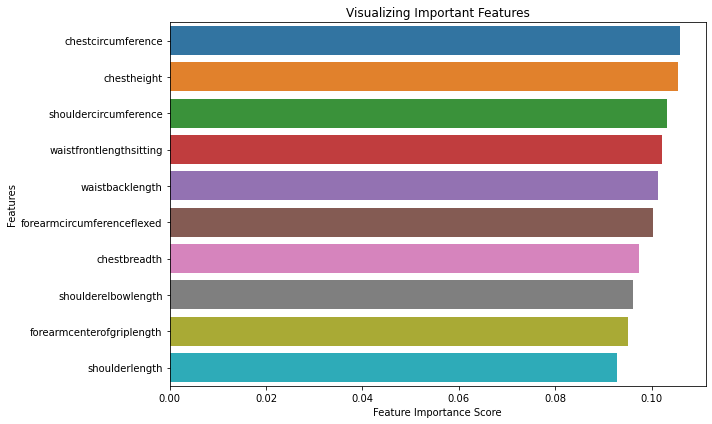

In [131]:
X_train = uncorrelated
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()